# `pandas` Foundations

## Data Ingestion & Inspection

How to get data in & analyse it

In [1]:
import pandas as pd

In [14]:
aapl_url = 'https://raw.githubusercontent.com/SmilodonCub/DATA602/master/AAPL.csv'
aapl_df = pd.read_csv( aapl_url )

In [4]:
print( type( aapl_df ) )
print( aapl_df.shape )
print( aapl_df.columns )
aapl_df.head( 5 )

<class 'pandas.core.frame.DataFrame'>
(184, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [15]:
print( type( aapl_df.columns ) )
print( aapl_df.index )
aapl_df['Date'] = aapl_df['Date'].astype('datetime64[ns]')
aapl_df.set_index( 'Date' , inplace=True, drop=True)
print( aapl_df.index )
print( type( aapl_df.index ) )
aapl_df.head( 5 )

<class 'pandas.core.indexes.base.Index'>
RangeIndex(start=0, stop=184, step=1)
DatetimeIndex(['2014-09-29', '2014-10-06', '2014-10-13', '2014-10-20',
               '2014-10-27', '2014-11-03', '2014-11-10', '2014-11-17',
               '2014-11-24', '2014-12-01',
               ...
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05', '2018-03-12', '2018-03-19',
               '2018-03-26', '2018-03-29'],
              dtype='datetime64[ns]', name='Date', length=184, freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


### Slicing
with `iloc`

In [17]:
aapl_df.iloc[ :5,: ]
#aapl_df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [18]:
aapl_df.iloc[ -5:,: ]
#aapl_df.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700
2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400
2018-03-29,167.804993,171.750000,166.899994,167.779999,167.779999,38398505


In [19]:
aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 184 entries, 2014-09-29 to 2018-03-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       184 non-null    float64
 1   High       184 non-null    float64
 2   Low        184 non-null    float64
 3   Close      184 non-null    float64
 4   Adj Close  184 non-null    float64
 5   Volume     184 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 10.1 KB


Each column of a `pandas` dataframe is a special structure of it's own called a `pandas Series`

In [20]:
low = aapl_df[ 'Low' ]
print( type( low ) )

<class 'pandas.core.series.Series'>


The `Series` has it's own `.head()` method and inherits the same index from the parent `DataFrame`

In [21]:
low.head()

Date
2014-09-29     98.040001
2014-10-06     98.309998
2014-10-13     95.180000
2014-10-20     98.220001
2014-10-27    104.699997
Name: Low, dtype: float64

In [23]:
#to extract just the values
print( type( low.values ) )
low.values[:5]

<class 'numpy.ndarray'>


array([ 98.040001,  98.309998,  95.18    ,  98.220001, 104.699997])

### Building DataFrames from Scratch

In [25]:
cities = [ 'Austin', 'Dalla', 'Austin', 'Dalles' ] #data for each column in multiple lists
signups = [ 7, 12, 3, 5 ]
visitors = [ 139, 237, 326, 456 ]
weekdays = [ 'Sun', 'Sun', 'Mon', 'Mon' ]
list_labels = [ 'city', 'signups', 'visitors', 'weekday' ]
list_cols = [ cities, signups, visitors, weekdays ] #list of lists
zipped = list( zip( list_labels, list_cols ) ) 
data = dict( zipped )
users = pd.DataFrame( data )
print( users )

     city  signups  visitors weekday
0  Austin        7       139     Sun
1   Dalla       12       237     Sun
2  Austin        3       326     Mon
3  Dalles        5       456     Mon


In [26]:
#creating new features
users[ 'fees' ] = 0 #broadcast the value 0 to an entire column
print( users )

     city  signups  visitors weekday  fees
0  Austin        7       139     Sun     0
1   Dalla       12       237     Sun     0
2  Austin        3       326     Mon     0
3  Dalles        5       456     Mon     0


In [28]:
users.index = [ 'A', 'B', 'C', 'D' ] #customize the index values
users.columns = [ 'City', 'Signups', 'Visitors', 'Weekday', 'Fees' ] #change the column labels
print( users )

     City  Signups  Visitors Weekday  Fees
A  Austin        7       139     Sun     0
B   Dalla       12       237     Sun     0
C  Austin        3       326     Mon     0
D  Dalles        5       456     Mon     0


### Importing & Exporting Data

In [45]:
sunspot_url = 'https://raw.githubusercontent.com/SmilodonCub/DATA602/master/ISSN_D_tot.csv'
sunspot_df = pd.read_csv( sunspot_url )
sunspot_df.head()

,1818,01,01.1,1818.004,-1,1
0,1818,1,2,1818.007,-1,1
1,1818,1,3,1818.010,-1,1
2,1818,1,4,1818.012,-1,1
3,1818,1,5,1818.015,-1,1
4,1818,1,6,1818.018,-1,1


In [46]:
sunspot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72103 entries, 0 to 72102
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   1818      72103 non-null  int64  
 1   01        72103 non-null  int64  
 2   01.1      72103 non-null  int64  
 3   1818.004  72103 non-null  float64
 4    -1       72103 non-null  int64  
 5   1         72103 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 3.3 MB


In [47]:
sunspot_df.iloc[ 10:20, : ]

,1818,01,01.1,1818.004,-1,1
10,1818,1,12,1818.034,-1,1
11,1818,1,13,1818.037,22,1
12,1818,1,14,1818.040,-1,1
13,1818,1,15,1818.042,-1,1
14,1818,1,16,1818.045,-1,1
15,1818,1,17,1818.048,46,1
16,1818,1,18,1818.051,59,1
17,1818,1,19,1818.053,63,1
18,1818,1,20,1818.056,-1,1
19,1818,1,21,1818.059,-1,1


looking at the slice, the column labels make no sence (are they really a row?), and what's up with the -1 entries?

In [48]:
#explicitly label the columns 
col_names = [ 'year', 'month', 'day', 'dec_date', 'sunspots', 'definite' ]
#use the header parameter to indicaate that the source file has no header & set the column names
#change the -1 values to NA
sunspot_df = pd.read_csv( sunspot_url, header=None, names = col_names, 
                         na_values = {'sunspots':[' -1']}, parse_dates = [ [ 0, 1, 2 ] ] )
sunspot_df.head( 10 )

,year_month_day,dec_date,sunspots,definite
0,1818-01-01,1818.004,NaN,1
1,1818-01-02,1818.007,NaN,1
2,1818-01-03,1818.010,NaN,1
3,1818-01-04,1818.012,NaN,1
4,1818-01-05,1818.015,NaN,1
5,1818-01-06,1818.018,NaN,1
6,1818-01-07,1818.021,NaN,1
7,1818-01-08,1818.023,39.0,1
8,1818-01-09,1818.026,NaN,1
9,1818-01-10,1818.029,NaN,1


In [49]:
sunspot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72104 entries, 0 to 72103
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year_month_day  72104 non-null  datetime64[ns]
 1   dec_date        72104 non-null  float64       
 2   sunspots        68857 non-null  float64       
 3   definite        72104 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 2.2 MB


In [51]:
sunspot_df.index = sunspot_df[ 'year_month_day' ]
sunspot_df.index.name = 'date'
print( sunspot_df.info() )
sunspot_df.head( 5 )

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72104 entries, 1818-01-01 to 2015-05-31
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year_month_day  72104 non-null  datetime64[ns]
 1   dec_date        72104 non-null  float64       
 2   sunspots        68857 non-null  float64       
 3   definite        72104 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 2.8 MB
None


,year_month_day,dec_date,sunspots,definite
date,,,,
1818-01-01,1818-01-01,1818.004,NaN,1
1818-01-02,1818-01-02,1818.007,NaN,1
1818-01-03,1818-01-03,1818.010,NaN,1
1818-01-04,1818-01-04,1818.012,NaN,1
1818-01-05,1818-01-05,1818.015,NaN,1


In [52]:
#select only the relevant data features
cols = [ 'sunspots', 'definite' ]
sunspots = sunspot_df[ cols ]
sunspots.head( 5 )

,sunspots,definite
date,,
1818-01-01,NaN,1
1818-01-02,NaN,1
1818-01-03,NaN,1
1818-01-04,NaN,1
1818-01-05,NaN,1


In [53]:
#writing files
out_csv = 'sunspots.csv'
sunspots.to_csv( out_csv )
#alternative: out_tsv

out_xlsx = 'sunspots.xlsx'
sunspots.to_excel( out_xlsx )

### Plotting with `pandas`

In [55]:
#load pyplot
import matplotlib.pyplot as plt

In [56]:
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [59]:
#plot numpy arrays
close_arr = aapl_df[ 'Close' ].values
type( close_arr )

numpy.ndarray

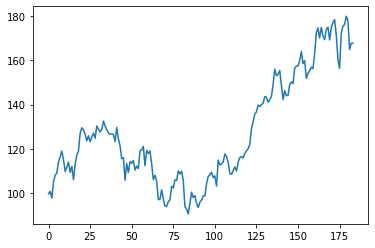

In [60]:
plt.plot( close_arr )
plt.show()

In [62]:
close_series = aapl_df[ 'Close' ]
type( close_series )

pandas.core.series.Series

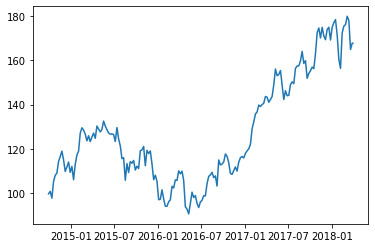

In [63]:
plt.plot( close_series )
plt.show()

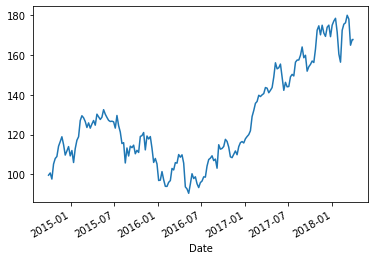

In [64]:
#pandas series plot method
close_series.plot()
plt.show()

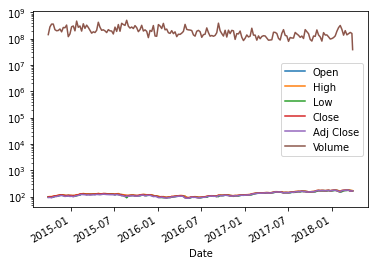

In [66]:
#pandas DataFrame plotmethod
aapl_df.plot()
plt.yscale( 'log' ) #sets a logarithmic scle on the vertical axis
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

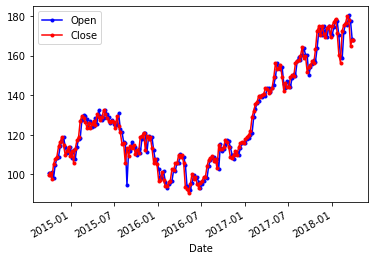

In [70]:
#customizing plots
aapl_df[ 'Open' ].plot( color = 'b', style = '.-', legend = True )
aapl_df[ 'Close' ].plot( color = 'r', style = '.-', legend = True )
#plt.axis( ( '2001', '2002', 0, 100) )
plt.show

In [71]:
#saving plots
#plt.savefig( 'aapl.png' ) #can infer the format from the suffix